<font style='font-size:1.5em'>**IMdB Data Collection and Intra-Source Analysis**</font>
---



In [38]:
## Imports 
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from plotnine import *
from plotnine.data import *
from plotnine import options

## Data Collection

In [39]:
imdb_1000_url = "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=0&ref_=adv_nxt"
HEADERS={"User-Agent": 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}

In [40]:
response = requests.get(imdb_1000_url, headers = HEADERS)
soup = BeautifulSoup(response.content, 'html.parser')
movies = soup.find_all('div', attrs = {"class":"lister-item-content"})
dict_list = []
for m in movies:
    title = m.find('a').text
    year = m.find("span", attrs={"class":"lister-item-year text-muted unbold"}).text
    if year[1] == 'I':
        if year[2] == 'I':
            year = year[6:-1]
        else:
            year = year[5:-1]
    else:
        year = year [1:][:-1]
    rating = m.find('div', attrs={"name":"ir"}).text.strip()
    rating = int(float(rating) * 10)
    votes = m.find('p', attrs={'class':'sort-num_votes-visible'})
    votes = votes.find('span', attrs={'name':'nv'}).text
    votes = int(votes.replace(',', ''))
    director = m.find('p', attrs={"class":""})
    director = director.find('a').text
    length = m.find('span', attrs={"class":"runtime"}).text
    length = length[:-4]
    source = "IMDb"
    span_text_muted = list(m.find_all('span', attrs={"class":"text-muted"}))
    try:
        if span_text_muted[2].text == "Gross:":
            revenue = m.find_all('span', attrs={'name':"nv"})[1].text
            revenue = revenue[1:-1]
        else:
            revenue = "NaN"
    except:
        revenue = 'NaN'
    genre_list = m.find('span', attrs={"class":"genre"}).text
    genre_list = genre_list.split(",")
    for g in range(len(genre_list)):
        data_dict = {}
        data_dict["title"] = title
        data_dict["director"] = director
        data_dict["year"] = year
        data_dict["genre"] = genre_list[g].strip()
        data_dict["revenue"] = revenue
        data_dict['rating'] = rating
        data_dict['length'] = length
        data_dict['source'] = source
        data_dict['votes'] = votes
        data_dict = pd.DataFrame(data_dict, index = [0])
        dict_list.append(data_dict)
        

In [41]:
df = pd.concat(dict_list)
df.reset_index(drop=True, inplace=True)
df

,title,director,year,genre,revenue,rating,length,source,votes
0,The Shawshank Redemption,Frank Darabont,1994,Drama,28.34,93,142,IMDb,2744368
1,The Godfather,Francis Ford Coppola,1972,Crime,134.97,92,175,IMDb,1908476
2,The Godfather,Francis Ford Coppola,1972,Drama,134.97,92,175,IMDb,1908476
3,The Dark Knight,Christopher Nolan,2008,Action,534.86,90,152,IMDb,2717090
4,The Dark Knight,Christopher Nolan,2008,Crime,534.86,90,152,IMDb,2717090
...,...,...,...,...,...,...,...,...,...
630,Rush,Ron Howard,2013,Biography,26.95,81,123,IMDb,490941
631,Rush,Ron Howard,2013,Drama,26.95,81,123,IMDb,490941
632,12 Years a Slave,Steve McQueen,2013,Biography,56.67,81,134,IMDb,715535
633,12 Years a Slave,Steve McQueen,2013,Drama,56.67,81,134,IMDb,715535


In [42]:
df_multi_genre = df
df_multi_genre = df_multi_genre.groupby(['title','director', 'year', 'revenue', 'rating', 'length', 'source', 'votes'])['genre'].agg(', '.join).reset_index()
df_multi_genre

,title,director,year,revenue,rating,length,source,votes,genre
0,12 Angry Men,Sidney Lumet,1957,4.36,90,96,IMDb,812474,"Crime, Drama"
1,12 Years a Slave,Steve McQueen,2013,56.67,81,134,IMDb,715535,"Biography, Drama, History"
2,1917,Sam Mendes,2019,159.23,82,119,IMDb,620509,"Action, Drama, War"
3,2001: A Space Odyssey,Stanley Kubrick,1968,56.95,83,149,IMDb,685118,"Adventure, Sci-Fi"
4,3 Idiots,Rajkumar Hirani,2009,6.53,84,170,IMDb,410680,"Comedy, Drama"
...,...,...,...,...,...,...,...,...,...
245,Witness for the Prosecution,Billy Wilder,1957,8.18,84,116,IMDb,129487,"Crime, Drama, Mystery"
246,Yojimbo,Akira Kurosawa,1961,NaN,82,110,IMDb,125827,"Action, Drama, Thriller"
247,Your Name.,Makoto Shinkai,2016,5.02,84,106,IMDb,286512,"Animation, Drama, Fantasy"
248,Z,Costa-Gavras,1969,0.08,82,127,IMDb,29966,"Crime, Drama, Thriller"


## Intra-Source Analysis

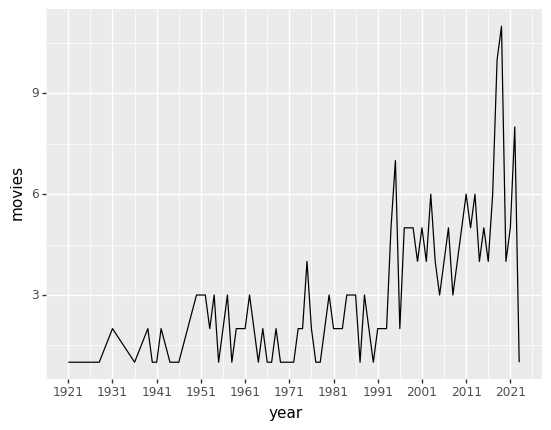

<ggplot: (8766139801835)>

In [43]:
year_df = df_multi_genre.groupby('year')['title'].count().reset_index(inplace=False, drop=False)
year_df['year'] = year_df['year'].astype(int)
year_df['title'].astype(int)
year_df

(
    ggplot(year_df)
    + geom_line(aes(x='year', y='title', group=1))
    +labs(x='year', y='movies')
    + scale_x_continuous(breaks=range(1921, 2023, 10))
)

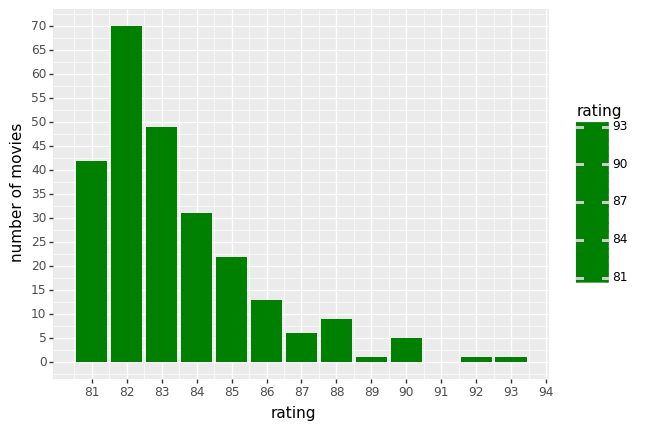

<ggplot: (8766139734733)>

In [44]:
rating_df = df_multi_genre.groupby('rating')['title'].count().reset_index(inplace=False, drop=False)
rating_df

(
    ggplot(rating_df, aes(x='rating', y='title', fill='rating'))
    + geom_bar(stat='identity')
    +labs(x='rating', y='number of movies')
    #+labs(x='rating')
    + scale_x_continuous(breaks=range(81, 100, 1))
    + scale_y_continuous(breaks=range(0, 80, 5))
    + scale_fill_gradient(low='green', high='green')
)


In [45]:
length_df = df_multi_genre.groupby('length')['title'].count().reset_index(inplace=False, drop=False)
length_df['length'] = length_df['length'].astype(int) / 60
length_df


,length,title
0,1.666667,1
1,1.683333,1
2,1.700000,4
3,1.716667,3
4,1.733333,1
...,...,...
94,1.583333,2
95,1.600000,3
96,1.616667,1
97,1.633333,3


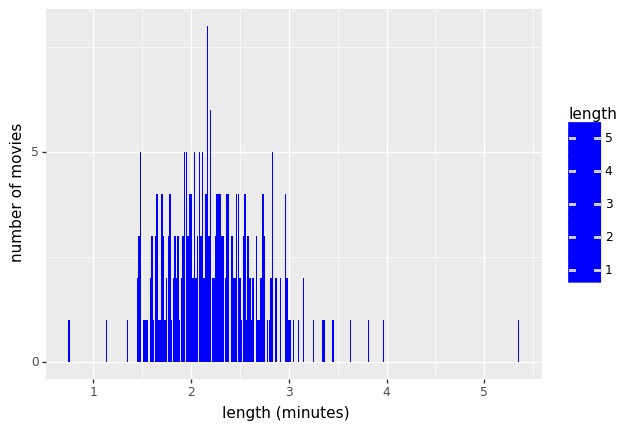

<ggplot: (8766091144039)>

In [46]:
(
    ggplot(length_df, aes(x='length', y='title', fill='length'))
    + geom_bar(stat='identity')
    +labs(x='length (minutes)', y='number of movies')
    #+labs(x='rating')
    + scale_x_continuous(breaks=list(range(0, 6, 1)))
    + scale_y_continuous(breaks=range(0, 200, 5))
    + scale_fill_gradient(low='blue', high='blue')
)

In [47]:
genre_count_df = df.groupby('genre')['title'].count().reset_index(inplace=False, drop=False)
rating_df
genre_count_df

,genre,title
0,Action,65
1,Adventure,56
2,Animation,19
3,Biography,30
4,Comedy,40
5,Crime,62
6,Drama,179
7,Family,11
8,Fantasy,13
9,Film-Noir,2


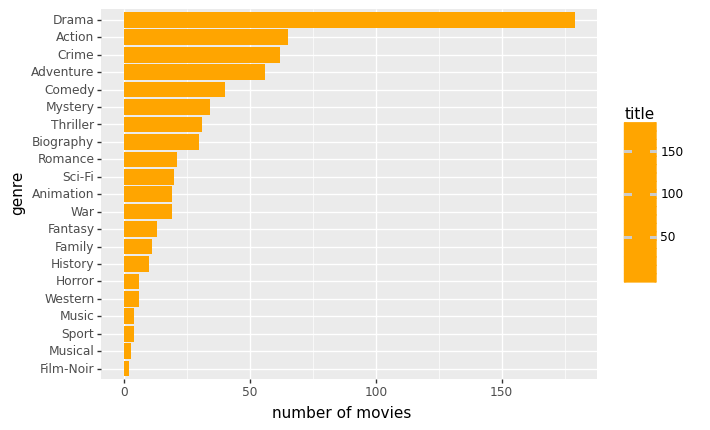

<ggplot: (8766139809247)>

In [48]:
genre_count_df = df.groupby('genre')['title'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)
genre_count_df['genre'] = pd.Categorical(genre_count_df['genre'], categories=genre_count_df['genre'][::-1])


(
    ggplot(genre_count_df, aes(x='genre', y='title', fill='title'))
    + geom_bar(stat='identity')
    +labs(x='genre', y='number of movies')
    +coord_flip()
    + scale_x_discrete()
    +scale_fill_gradient(low='orange', high='orange')
)

In [49]:
director_count_df = df_multi_genre.groupby('director')['title'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)
director_count_df

,director,title
0,Akira Kurosawa,7
1,Steven Spielberg,7
2,Christopher Nolan,7
3,Martin Scorsese,6
4,Stanley Kubrick,6
...,...,...
160,Henri-Georges Clouzot,1
161,Haruo Sotozaki,1
162,Hanu Raghavapudi,1
163,Gus Van Sant,1


In [50]:
df_top_30_directors = director_count_df.head(30).sort_values('title', ascending=False)
df_top_30_directors['director'] = pd.Categorical(df_top_30_directors['director'], categories=df_top_30_directors['director'][::-1])
df_top_30_directors

,director,title
0,Akira Kurosawa,7
2,Christopher Nolan,7
1,Steven Spielberg,7
3,Martin Scorsese,6
4,Stanley Kubrick,6
5,Alfred Hitchcock,5
6,Quentin Tarantino,5
7,Billy Wilder,5
8,Charles Chaplin,4
9,Sergio Leone,4


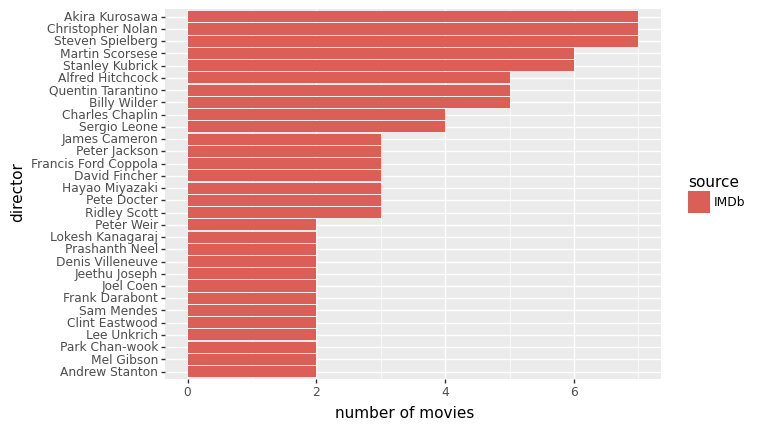

<ggplot: (8766125881495)>

In [51]:
ggplot(df_top_30_directors, aes(x='director', y='title', fill='source'))+ \
geom_bar(stat='identity') + \
labs(x='director', y='number of movies')  + \
coord_flip() + \
scale_x_discrete() #+ \
#scale_fill_gradient(low='yellow', high='yellow')


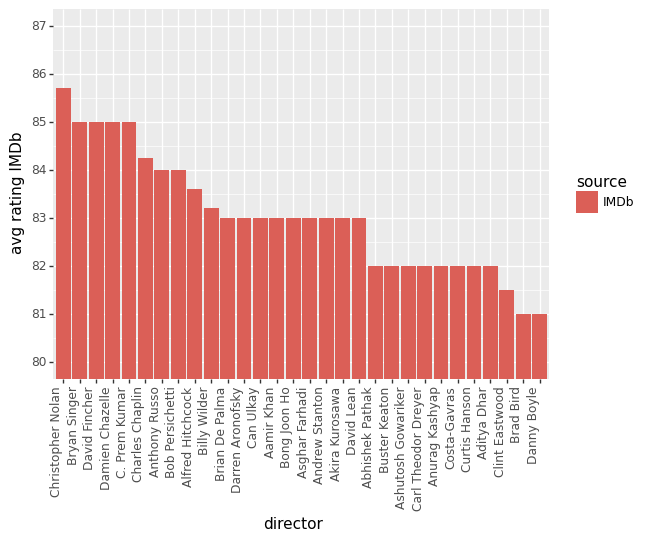

<ggplot: (8766088745415)>

In [52]:
director_avg_rating_df = df_multi_genre.groupby('director')['rating'].mean().head(30).sort_values(ascending=False).reset_index(drop=False, inplace=False)
director_avg_rating_df['rating'] = director_avg_rating_df['rating'].astype(float)
#director_avg_rating_df



ggplot(director_avg_rating_df, aes(x='director', y='rating', fill='source'))+ \
geom_bar(stat='identity') + \
labs(x='director', y='avg rating IMDb')  + \
coord_flip() + \
scale_y_continuous(breaks=range(70, 100, 1)) + \
coord_cartesian(ylim=(80, 87)) + \
scale_x_discrete(limits=director_avg_rating_df['director'][director_avg_rating_df['rating'] >= 0].tolist()) + \
theme(axis_text_x=element_text(rotation=90, hjust=1)) 



In [53]:
revenue_director_df = df_multi_genre[['director', 'revenue']]
revenue_director_df['revenue'] = revenue_director_df['revenue'].replace(['NaN'], '')
revenue_director_df['revenue'] = pd.to_numeric(revenue_director_df['revenue'], errors='coerce')
revenue_director_df = revenue_director_df.dropna(subset=['revenue'])
revenue_director_df['revenue'] = revenue_director_df.groupby('director')['revenue'].transform('mean')
revenue_director_df = revenue_director_df.drop_duplicates(subset='director')
revenue_director_df = revenue_director_df.sort_values(by='revenue', ascending=False).head(30).reset_index(drop=True, inplace=False)
revenue_director_df = revenue_director_df.sort_values(by='revenue', ascending=True)


/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_20503/1669186233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_k/70j44p_s1n11977s45tmdvz80000gn/T/ipykernel_20503/1669186233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


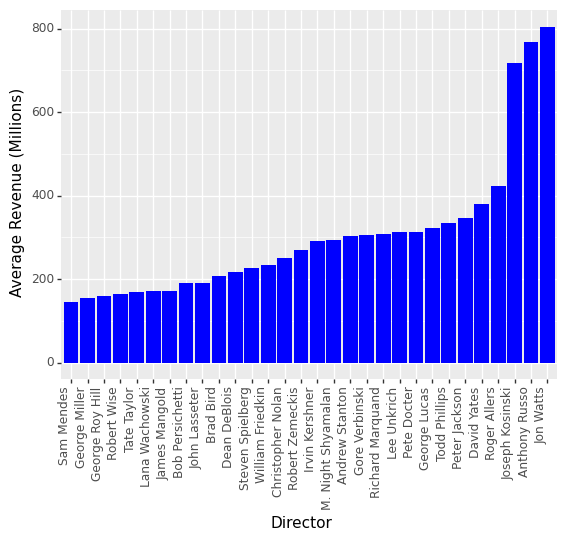

<ggplot: (8766089767632)>

In [54]:
ggplot(revenue_director_df, aes(x=pd.Categorical(revenue_director_df['director'], categories=revenue_director_df['director']), y='revenue')) + \
  geom_bar(stat='identity', fill='blue') + \
  scale_y_continuous() + \
  labs(x='Director', y='Average Revenue (Millions)') + \
  theme(axis_text_x=element_text(rotation=90, hjust=1))

In [56]:
df_rating_votes = df_multi_genre[['rating', 'votes']]
df_rating_votes['rating'].max()
#df_rating_votes

93

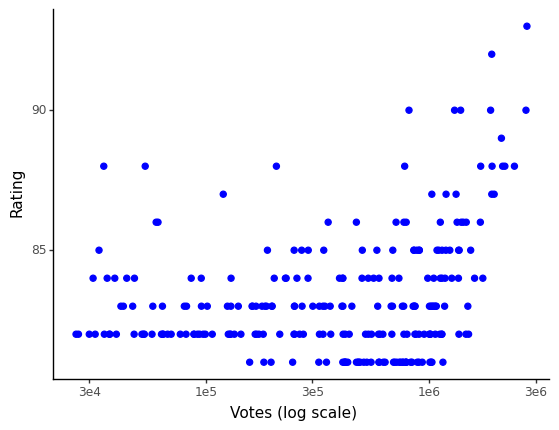

<ggplot: (8766089455041)>

In [57]:
(ggplot(df_rating_votes, aes(x='votes', y='rating'))
 + geom_point(color='blue', size=2)
 + scale_x_log10()
 + labs(x='Votes (log scale)', y='Rating')
 + theme_classic()
)